# A/B Test Analysis Project

* Contents <a id='back'></a>

* [Introduction](#intro)
* [General information of the datasets](#general)
* [Optimizing the data for analysis](#optimize)
* [Checking for duplicates and missing values](#check)
* [Prioritizing Hypotheses](#prioritizing)
* [A/B Test Analysis](#abtest)
    * [Cumulative revenue by group](#6.1)
    * [Cumulative average order size by group](#6.2)
    * [The relative difference in cumulative average order size for group B compared with group A](#6.3)
    * [Each group's conversion rate as the ratio of orders to the number of visits for each day. The daily conversion rates of the two groups](#6.4)
    * [The number of orders per user](#6.5)
    * [The 95th and 99th percentiles for the number of orders per user](#6.6)
    * [Plot a scatter chart of order prices](#6.7)
    * [The 95th and 99th percentiles of order prices](#6.8)
    * [The statistical significance of the difference in conversion between the groups](#6.9)
    * [The statistical significance of the difference in average order size between the groups](#6.10)
    * [The statistical significance of the difference in conversion between the groups using the filtered data](#6.11)
    * [The statistical significance of the difference in average order size between the groups using the filtered data](#6.12)
    * [Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test](#6.13)

## Introduction

A/B testing is a methodology for comparing two versions of a webpage or app against each other to determine which one performs better. In our case, we want to boost revenue of a big online store.

The project contains 3 datasets:
1. Hypotheses - contains several hypotheses and their `reach`, `impact`, `confidence`, and `effort` points.
2. Orders - contains order identifier, user identifier, date, revenue, and test group that the user belongs to.
3. Visits - contains date, group, and number of visits

Together with the marketing department, we've compiled a list of hypotheses that may help boost revenue. We need to prioritize these hypotheses, launch an A/B test, and analyze the results.

* Step 1: Optimizing Data-
    Change column names, check for missing and duplicated values and optimize the data for analysis.
    
* Step 2: Prioritizing Hypotheses-
    Aplly the `ICE` and `RICE` framework to prioritize hypotheses. Show how the prioritization of hypotheses changes when you use RICE instead of ICE.
    
* Step 3: A/B Test Analysis-
    Graph charts, calculate conversion rates and percentiles, find statistical significance and make decision based on the test results.


## General Information of the datasets <a id='general'></a>

In [75]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

* `hipotheses` data frame

In [76]:
#Read 'htpotheses' data frame
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
print(hypotheses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


There are 5 columns and 9 rows each in `hepotheses` data frame. The data frame contains hypotheses with Reach,Impact,Confidence and Effort specified for each. Lowercase the column name will make it easier to work on the data. The data types are acceptable.

* `orders` data frame

In [77]:
#Read 'orders' data frame
orders = pd.read_csv('/datasets/orders_us.csv')
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


There are 5 columns and 1197 rows in `orders` data frame. 

* `visits` data frame

In [78]:
#Read 'visits' data frame
visits = pd.read_csv('/datasets/visits_us.csv')
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


[Back to Contents](#back)

## Optimizing the data for analysis <a id='optimize'></a>

The `hypotheses` columns will be changed to lowercase, and the column `"date"` of visits data frame will be changed to `datetime64[ns]`.

In [79]:
#Rename columns name using rename() method
hypotheses.rename(columns={'Hypothesis': 'hypothesis', 'Reach': 'reach', 'Impact': 'impact', 'Confidence': 'confidence', 'Effort': 'effort'}, inplace=True)
hypotheses
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Checking for duplicates and missing values <a id='check'></a>

The `analyze_data` function will check for missing values(using `isna()` method) and duplicated values(using `duplicated()` method). Since `hypotheses` data frame contains only 9 columns we will not check for missing or duplicated values for this dataset.

In [80]:
def analyze_data(df):

    # Missing values
    print(df.isna().sum())
    print()

    # Duplicates
    
    print(df.duplicated().sum())
    print()

    # Random rows
    display(df.sample(10))

Check for `orders` data frame

In [81]:
analyze_data(orders)

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0



,transactionId,visitorId,date,revenue,group
995,3465107905,2075883701,2019-08-31,45.2,B
765,1457259561,2421265884,2019-08-07,20.2,B
91,3176574859,2742574263,2019-08-22,275.9,B
839,2368020497,2870367609,2019-08-21,25.7,B
1118,418108717,1985475298,2019-08-13,15.5,B
1067,3291040387,1263373242,2019-08-12,70.2,B
573,1887336629,6958315,2019-08-04,25.9,B
1194,1807773912,573423106,2019-08-14,165.3,A
1175,1373388206,3717692402,2019-08-14,40.9,B
908,3352225027,1807547430,2019-08-05,5.2,B


Check for `visits` data frame

In [82]:
analyze_data(visits)

date      0
group     0
visits    0
dtype: int64

0



,date,group,visits
18,2019-08-19,A,502
40,2019-08-10,B,369
61,2019-08-31,B,718
16,2019-08-17,A,412
57,2019-08-27,B,720
38,2019-08-08,B,654
41,2019-08-11,B,721
46,2019-08-16,B,413
44,2019-08-14,B,746
0,2019-08-01,A,719


The output shows no missing or duplicated values.

* Check for users that participated in both groups.

In [83]:
# Find users who appear in more than one group
group_counts = orders.groupby('visitorId')['group'].nunique()

# Identify users who are in both groups
multi_group_users = group_counts[group_counts > 1].index

# Drop rows with these users
orders = orders[~orders['visitorId'].isin(multi_group_users)]

In [84]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


Filtered data contains 1016 rows. 181 rows were droped.

[Back to Contents](#back)

## Prioritizing Hypotheses <a id='prioritizing'></a>

* `ICE` score of hypotheses.

In [85]:
#Calculate `ice` for the hypotheses
hypotheses['ice'] = (hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']).round(2)
pd.options.display.max_colwidth = 210
hypotheses.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


* `RICE` score of hypotheses.

In [86]:
#Calculate `rice` for the hypotheses
hypotheses['rice'] = hypotheses['reach']*hypotheses['impact']*hypotheses['confidence']/hypotheses['effort']
hypotheses.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0


# Conclusion:
There are large differences between the `ICE` and `RICE` points in most of the hypotheses. At first glance, we can see that 1, 3, 4, 5, and 8 have the lowest `ICE` and `RICE` points . The `RICE` point of 6th hypothesis is high, but we have another hypothesis (0 hypothesis) with the same `RICE` point and a higher `ICE` point. We have 3 options left. First we need to understand what `ICE` and `RICE` are.
    
*    RICE emphasizes scalability — something hard to implement but reaching many users might rank higher.
*    ICE is more qualitative and quick — good for fast decisions when data is limited.

In other words:
*    Speed & simplicity? Favor ICE.
*    Scalability & user impact? Favor RICE.

We launch and A/B test in order to boost revenue. Revenue isn't just about how impactful an idea is — it's also how many people are affected. `RICE` includes "Reach", which helps prioritize ideas that scale across a bigger user base. We want a higher `RICE` point rather than `ICE` point. In our case, hypothesis 7 is more siutable, since it has the highest `RICE` point of 112.0.

## A/B Test Analysis <a id='abtest'></a>

###  Cumulative revenue by group <a id='6.1'></a>

* Cumulative revenue is the total revenue generated by a business or product over a certain period of time.

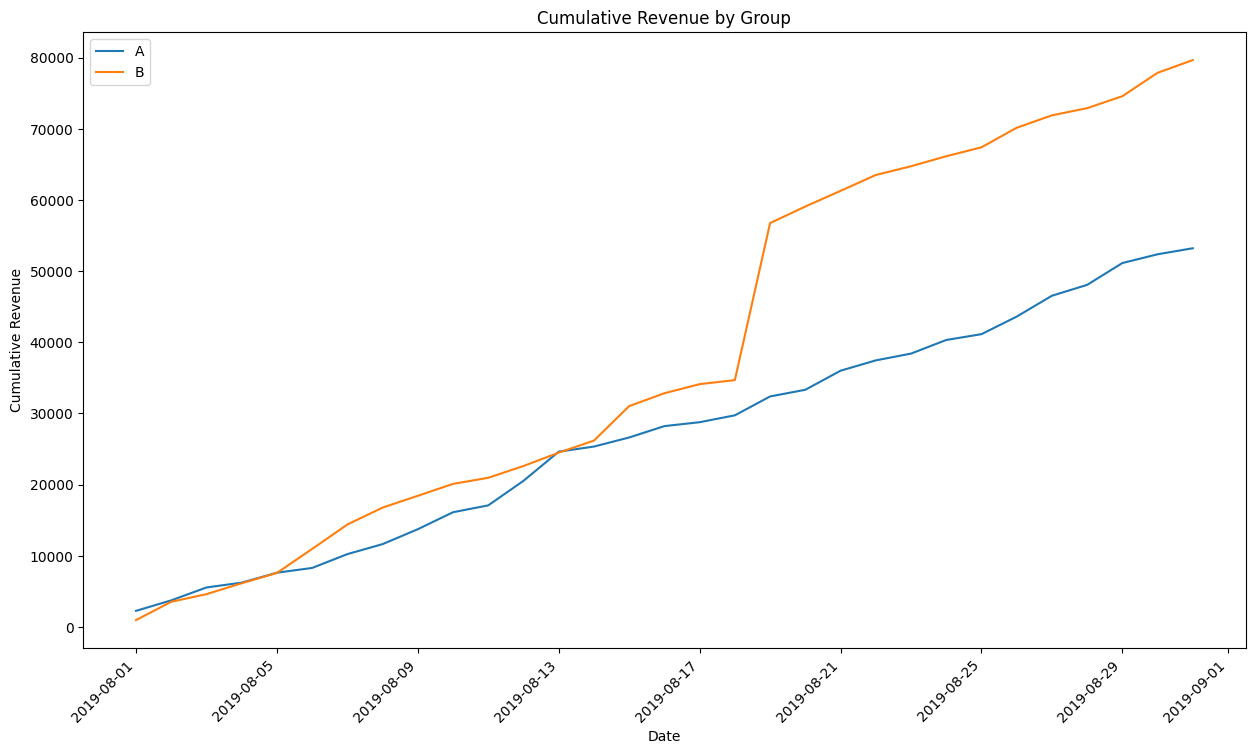

In [87]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

# DataFrame with cumulative orders and cumulative revenue by day, group A
cum_rev_A = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cum_rev_B = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,8))
# Plotting the group A revenue graph 
plt.plot(cum_rev_A['date'], cum_rev_A['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cum_rev_B['date'], cum_rev_B['revenue'], label='B')

plt.xticks(rotation=45, ha='right')
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.show()

# Conclusions:
*    Group B outperforms group A in cumulative revenue throughout the entire observation period.
*    Both groups show a continuous increase in revenue, but group B but Group B's curve is steeper, meaning higher daily revenue on average.
*    Group B generated ~44% more revenue than Group A

# Conjectures:
*    Group B’s variation introduced a change that improved revenue generation.
*    Visitor behavior in Group B may have been more favorable, suggesting that the changes made for Group B increased user engagement or purchase frequency

[Back to Contents](#back)

### Cumulative average order size by group <a id='6.2'></a>

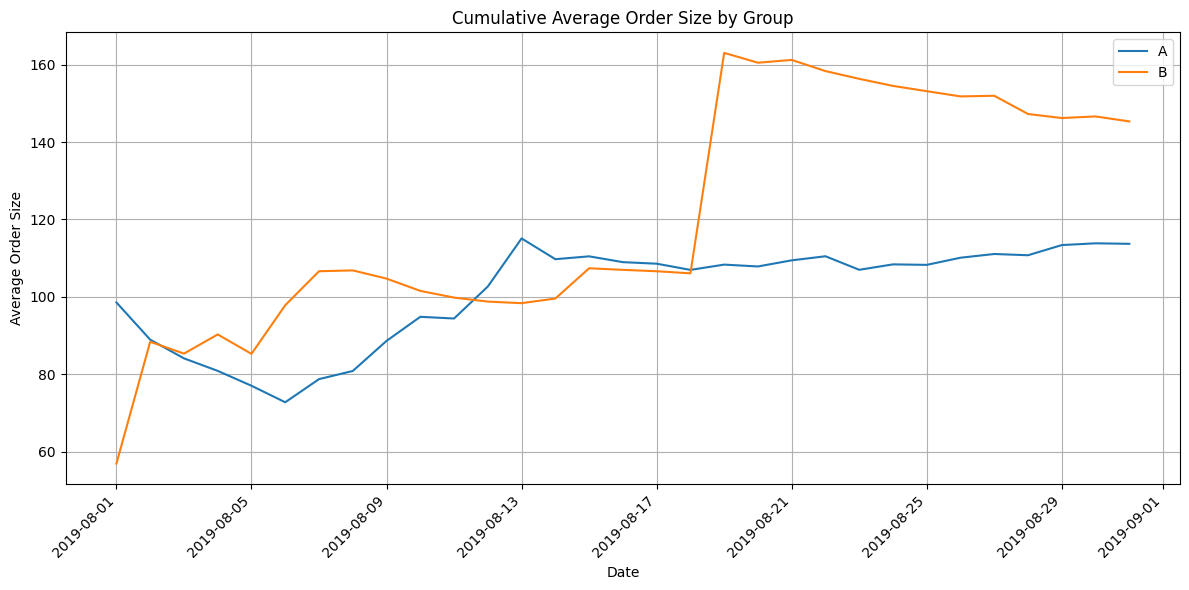

In [88]:
# Plot
plt.figure(figsize=(12, 6))

plt.plot(cum_rev_A['date'], cum_rev_A['revenue']/cum_rev_A['orders'], label='A')
plt.plot(cum_rev_B['date'], cum_rev_B['revenue']/cum_rev_B['orders'], label='B')

plt.xticks(rotation=45, ha='right')
plt.title('Cumulative Average Order Size by Group')
plt.xlabel('Date')
plt.ylabel('Average Order Size')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Conclusions:
*    Group B has a higher average order value than Group A throughout the observed period.
*    This could imply that whatever change or hypothesis was applied to Group B positively influenced customer spending behavior.

# Conjectures:
*    The hypothesis tested on Group B may have encouraged higher-value purchases.
*    This result may justify implementing the tested changes in Group B across the entire platform if this difference proves statistically significant.

### The relative difference in cumulative average order size for group B compared with group A <a id='6.3'></a>

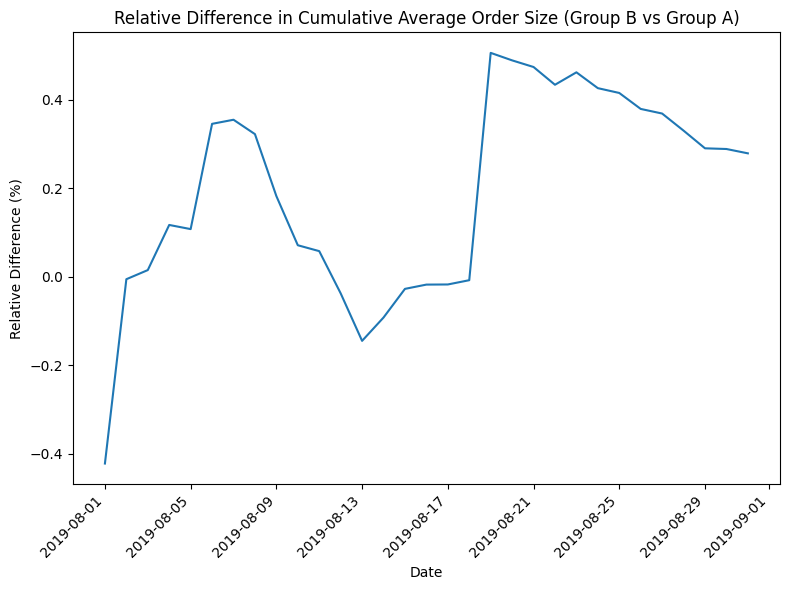

In [89]:
# gathering the data into one DataFrame
merged_cum_rev = cum_rev_A.merge(cum_rev_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(8, 6))
# plotting a relative difference graph for the average purchase sizes
plt.plot(merged_cum_rev['date'], (merged_cum_rev['revenueB']/merged_cum_rev['ordersB'])/(merged_cum_rev['revenueA']/merged_cum_rev['ordersA'])-1)

# adding the X axis
plt.title('Relative Difference in Cumulative Average Order Size (Group B vs Group A)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('Relative Difference (%)')
plt.tight_layout()
plt.show()

# Conclusions:

*    The graph showing the difference in average order size between the groups. We see that group B had a good start but then dropped by around 17% on August 13th, then peaked between positions 17-20.

[Back to Contents](#back)

### Each group's conversion rate as the ratio of orders to the number of visits for each day. The daily conversion rates of the two groups <a id='6.4'></a>

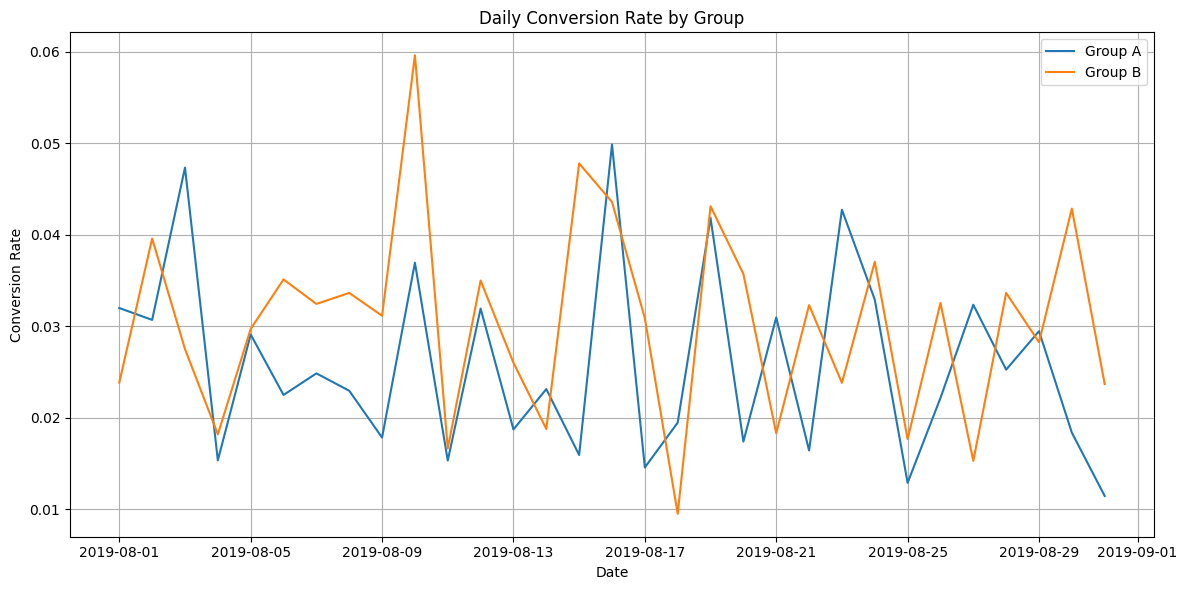

In [90]:
# Prepare daily orders count per group
daily_orders = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
daily_orders = daily_orders.rename(columns={'transactionId': 'orders'})

# Merge with visits data
daily_data = pd.merge(visits, daily_orders, on=['date', 'group'], how='left')
daily_data['orders'] = daily_data['orders'].fillna(0)

# Calculate conversion rate
daily_data['conversion_rate'] = daily_data['orders'] / daily_data['visits']

# Pivot for plotting
conversion_rates = daily_data.pivot(index='date', columns='group', values='conversion_rate')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(conversion_rates.index, conversion_rates['A'], label='Group A')
plt.plot(conversion_rates.index, conversion_rates['B'], label='Group B')
plt.title('Daily Conversion Rate by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

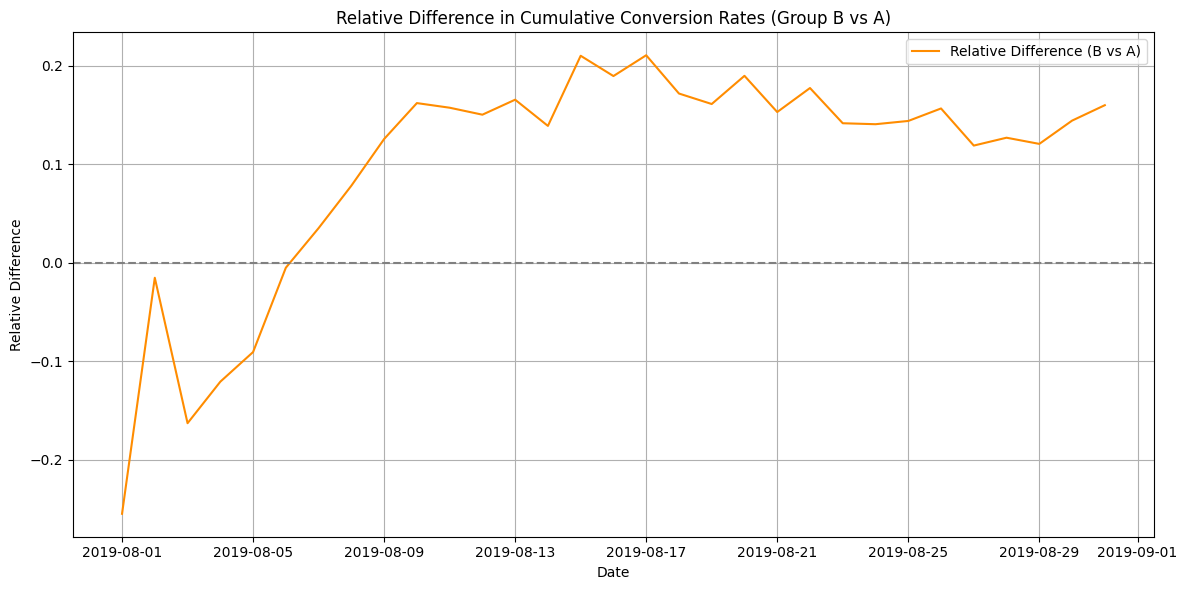

In [91]:
orders_daily = orders.groupby(['date', 'group'])['transactionId'].nunique().unstack().fillna(0)
visits_daily = visits.groupby(['date', 'group'])['visits'].sum().unstack().fillna(0)

# Ensure the index is sorted by date
orders_daily = orders_daily.sort_index()
visits_daily = visits_daily.sort_index()


cumulative_orders = orders_daily.cumsum()
cumulative_visits = visits_daily.cumsum()

# Compute conversion rates
conversion_A = cumulative_orders['A'] / cumulative_visits['A']
conversion_B = cumulative_orders['B'] / cumulative_visits['B']

# Compute relative difference
relative_diff = (conversion_B - conversion_A) / conversion_A

# Plot
plt.figure(figsize=(12, 6))
plt.plot(relative_diff.index, relative_diff, label='Relative Difference (B vs A)', color='darkorange')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Relative Difference in Cumulative Conversion Rates (Group B vs A)')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusions:
*    Group B has a higher daily conversion rate than Group A across most of the experiment.

*    This indicates that more visitors in Group B are placing orders, which supports the idea that the experiment had a positive impact.

# Conjectures:
*    The treatment applied to Group B likely increased engagement or trust, leading to more users completing purchases.

*    The consistent advantage suggests that the difference is not due to random chance, and may warrant further statistical testing.

*    A combination of higher conversion rate and larger order size in Group B implies a compounding positive effect from the tested change.

### The number of orders per user <a id='6.5'></a>

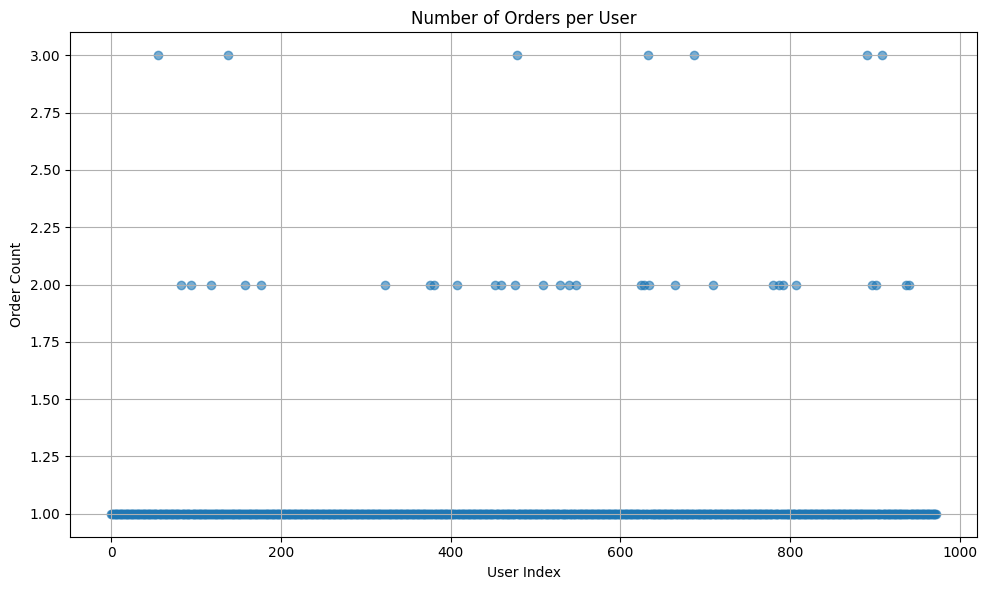

In [92]:
# Count the number of orders per user
orders_per_user = orders.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user = orders_per_user.rename(columns={'transactionId': 'order_count'})

# Plot scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(range(len(orders_per_user)), orders_per_user['order_count'], alpha=0.6)
plt.title('Number of Orders per User')
plt.xlabel('User Index')
plt.ylabel('Order Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusions:
*    Most users are one-time buyers, which is typical in many e-commerce scenarios.

*    A small minority of repeat customers exist and could represent a valuable segment worth nurturing.

# Conjectures:
*    These repeat buyers might be highly engaged customers, possibly influenced by marketing campaigns, loyalty programs, or favorable product experience.

*    Identifying and understanding what drives these users could help in designing strategies to increase customer retention and boost overall revenue.

[Back to Contents](#back)

### The 95th and 99th percentiles for the number of orders per user <a id='6.6'></a>

In [93]:
# Creat new table
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_by_users.columns = ['visitorId', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


* Plot a distribution histogram with the number of orders per user.

(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

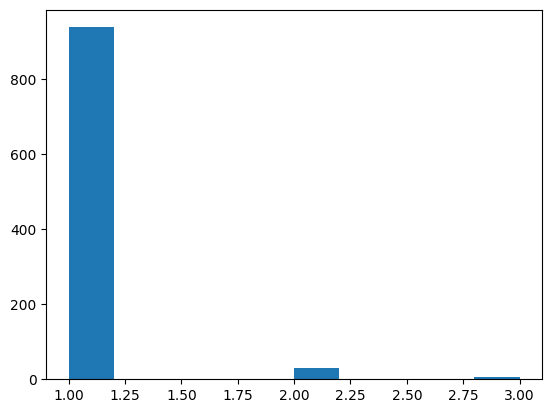

In [94]:
plt.hist(orders_by_users['orders'])

*  Most of the users placed less than 2 orders. We will calculate percentiles for the number of orders per user.

In [95]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


# Conclusions:
*    No more than 5% of users placed more than 2 orders, and 1% of users made more than 4. 

*    These users are highly engaged and might represent a power user segment.

*    They could be ideal targets for loyalty programs, beta tests, or personalized offers.

# Conjectures:
*    These users may have found specific products or services highly valuable.

*    They may respond well to retargeting or promotional strategies and could offer insights into what drives repeat purchases.

### Plot a scatter chart of order prices <a id='6.7'></a>

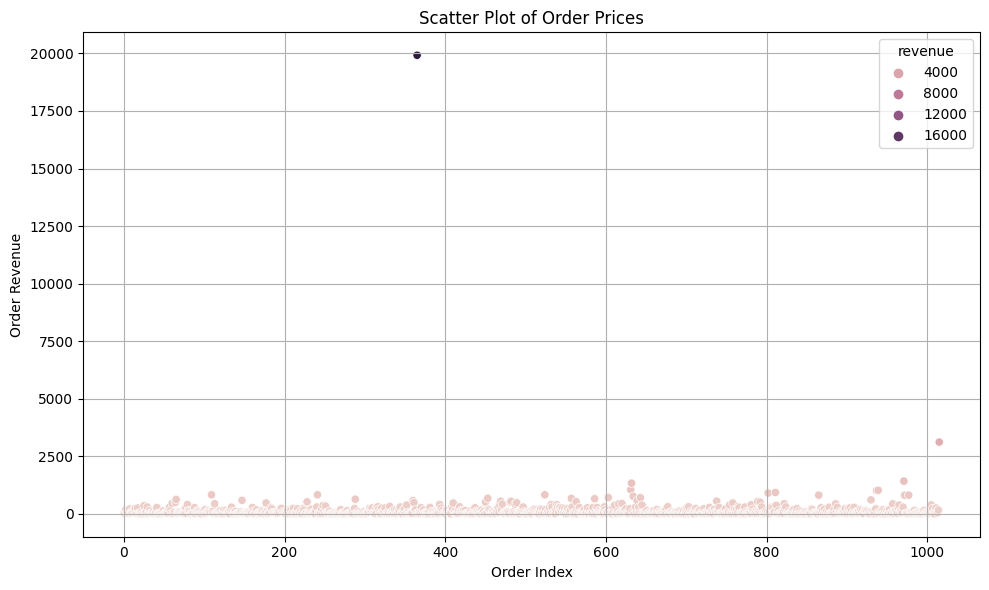

In [96]:
# Plot scatter chart of order prices
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90, 100])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders, x=range(len(orders)), y=orders['revenue'], hue=orders['revenue'])
plt.title('Scatter Plot of Order Prices')
plt.xlabel('Order Index')
plt.ylabel('Order Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusions:
*    The bulk of order prices are modest, suggesting that most users make small to moderate purchases.

*    A small number of high-value orders could be skewing average revenue figures and should be analyzed separately.

# Conjectures:
*    The outliers may represent purchases of premium or bulk products, or even pricing/reporting errors.

*    Investigating those high-revenue orders could help identify opportunities for upselling or bundling.

*    Segmenting users based on order size might allow for more tailored marketing strategies.

[Back to Contents](#back)

### The 95th and 99th percentiles of order prices <a id='6.8'></a>

(array([852., 108.,  32.,   9.,   8.,   3.,   1.,   1.,   0.,   0.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

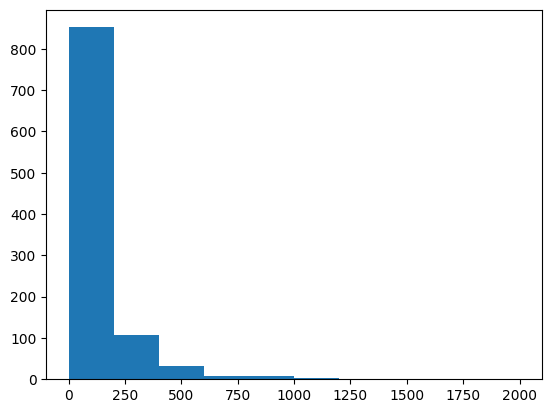

In [97]:
# Plot hist of order prices
plt.hist(orders['revenue'], range=(0, 2000))

* The data contains orders that cost more than `$1000`. But most of the orders cost less than `$250`.

In [98]:
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


# Conclusions:
*    No more than 5% of order's price more than 414.275, and 1% of orders priced more than 830.3.

###  The statistical significance of the difference in conversion between the groups <a id='6.9'></a>

* Null Hypothesis (H₀): There isn't a difference in conversion rates between the groups.
* Alternative Hypothesis (H₁): There is a difference in conversion rates between the groups.

In [99]:
alpha = 0.05
# Create tables for each group
orders_by_users_A = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_by_users_A.columns = ['visitorId', 'orders']

orders_by_users_B = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_by_users_B.columns = ['visitorId', 'orders']

# Create samples for each group
sampleA = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)

p_value = float("{0:}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print(f'P-value: {p_value}')
print(f'Relative loss of group B: {"{0:}".format(sampleB.mean()/sampleA.mean()-1)}')

if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

P-value: 0.011018084110014696
Relative loss of group B: 0.1597977924896936
Null hypothesis rejected: the difference is statistically significant


# Conclusion: 
* p-value	Interpretation
* < 0.01	Very strong evidence against the null hypothesis
* < 0.05	Strong evidence against the null hypothesis
* > 0.05	Weak or no evidence against the null hypothesis
* Based on the raw data, there is a difference between groups A and B. The p-value is 0.0110, which is smaller than 0.05. So, we are rejecting the null hypothesis and conclude that there is a statistically significant difference in conversion between the groups.

[Back to Contents](#back)

### The statistical significance of the difference in average order size between the groups <a id='6.10'></a>

* Null Hypothesis (H₀): There isn't a difference in statistical significance of the difference in average order size between the groups.
* Alternative Hypothesis (H₁): There is a difference in statistical significance of the difference in average order size between the groups.

In [104]:
p_value = float('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print(f"P-value: {p_value}")
print(f"Loss of group B: {'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)}")
if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

P-value: 0.862
Loss of group B: 0.278
Failed to reject the null hypothesis: we can't make conclusions about the difference


# Conclusion:

*    The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups.
* Based on the raw data, there isn't a difference between groups A and B. The p-value is 0.862, which is greater than 0.05. So, we can not reject the null hypothesis and conclude that there isn't a statistically significant difference in conversion between the groups.

### The statistical significance of the difference in conversion between the groups using the filtered data <a id='6.11'></a>

* Null Hypothesis (H₀): There isn't a difference in conversion rates between the groups.
* Alternative Hypothesis (H₁): There is a difference in conversion rates between the groups.

* Let's define anomalous users.

In [101]:
# Calculate percentile thresholds dynamically
orders_A_percentile_95 = np.percentile(orders_by_users_A['orders'], 95)
orders_B_percentile_95 = np.percentile(orders_by_users_B['orders'], 95)
revenue_percentile_95 = np.percentile(orders['revenue'], 95)

# Then use these calculated thresholds in your filtering
usersWithManyOrders = pd.concat([
    orders_by_users_A[orders_by_users_A['orders'] > orders_A_percentile_95]['visitorId'], 
    orders_by_users_B[orders_by_users_B['orders'] > orders_B_percentile_95]['visitorId']
], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_percentile_95]['visitorId']
abnormal_users = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormal_users.head(5))
print(abnormal_users.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
(86,)


* We have 86 anomalous users in total. Let's create new samples of the filtered data.

In [105]:
# Create samples using the filtered data for each group
sampleAFiltered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitorId'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_users_A['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitorId'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_users_B['orders'])),name='orders')],axis=0)

# Apply the statistical Mann-Whitney criterion to the resulting samples
p_value = float("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print(f'P-value: {p_value}')
print(f'Loss of group B: {"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)}')
if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

P-value: 0.016
Loss of group B: 0.174
Null hypothesis rejected: the difference is statistically significant


# Conclusion:
*    The results for conversion almost ddidn't change. We still can reject the null hypothesis.
* Based on the raw data, there is a difference between groups A and B. The p-value is 0.016, which is smaller than 0.05. So, we are rejecting the null hypothesis and conclude that there is a statistically significant difference in conversion between the groups.

### The statistical significance of the difference in average order size between the groups using the filtered data <a id='6.12'></a>

* Null Hypothesis (H₀): There isn't a difference in statistical significance of the difference in average order size between the groups.
* Alternative Hypothesis (H₁): There is a difference in statistical significance of the difference in average order size between the groups.

In [107]:
p_value = float('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]))

print(f'P-value: {p_value}')
print('Loss of group B: ', '{0:.3f}'.format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))
if (p_value < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

P-value: 0.771
Loss of group B:  -0.033
Failed to reject the null hypothesis: we can't make conclusions about the difference


# Conclusion:
*    The p-value increased, but now the difference between the segments is -3.3% instead of 27.8%.
* Based on the raw data, there isn't a difference between groups A and B. The p-value is 0.771, which is greater than 0.05. So, we can not reject the null hypothesis and conclude that there isn't a statistically significant difference in conversion between the groups.

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test. <a id='6.13'></a>

# Summary of Findings:
1. Cumulative Average Order Size
*    Group B consistently outperforms Group A.

*    The difference grows over time.

*    Relative difference between B and A reaches 10–20%.

2. Conversion Rate
*    Group B has a higher daily conversion rate across most of the test period.

3. Order Behavior
*    No anomalies in data suggest unfair biases.

*    Repeat purchasers and high-value orders are rare, but Group B still wins on average.

4. Conversion Rate
*    Group B showed a statistically significant higher conversion rate than Group A.

*    The uplift is meaningful and sustained across the test period.

#  Conclusion
*    Group B has shown a clear advantage in conversion rate with no downside in order size. Even though the revenue per order isn’t significantly different, the volume of conversions gives Group B the edge.

# Decision Recommendation:
Decision: 1. Stop the test, consider Group B the leader.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 



Thank you for your work 🤝

You did a great research with correct intermediate conclusions, clean code and good visualization. You managed to correctly apply the frameworks for testing hypotheses, identify anomalies in the data and perform all the statistical tests.

I also fully agree with your test results. In this project, you can fall into the "peeking problem" and wait until there is a difference in metrics, but doing so is wrong. You can read more here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over
    


    
</div>

[Back to Contents](#back)